In [3]:
6

6

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

weather_df = pd.read_csv("D:\RESEARCH\Dasarnya\MATH\Step_4_Statistics and Calculus Python\My Source Code\Work_3\weather_data.csv")
weather_df

,day,city,weather
0,0,St Louis,sunny
1,0,New York,cloudy
2,0,San Francisco,sunny
3,1,New York,rain
4,1,St Louis,cloudy
5,1,San Francisco,windy
6,2,San Francisco,sunny
7,2,New York,cloudy
8,2,St Louis,cloudy
9,3,New York,sunny


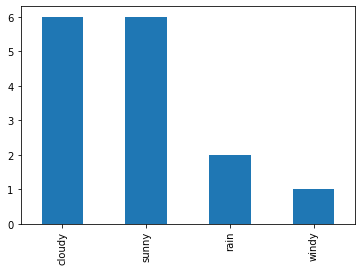

In [5]:
weather_df['weather'].value_counts().plot.bar()
plt.show()

Memvisualisasikan informasi yang sama seperti step sebelumnya

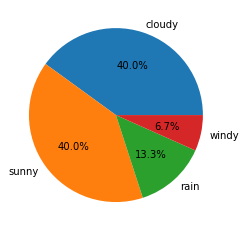

In [6]:
weather_df['weather'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.show()

Sekarang kita visualisasikan jumlah jenis cuaca ini. sekalian dengan informasi ttg persentase yang dihitung setiap jenis cuaca. Di sini saya akan menggunakan metode groupby()

In [7]:
weather_df.groupby(['weather','city'])['weather'].count().unstack('city')

city,New York,San Francisco,St Louis
weather,,,
cloudy,3.0,NaN,3.0
rain,1.0,NaN,1.0
sunny,1.0,4.0,1.0
windy,NaN,1.0,NaN


Kita lihat, objek ini memuat informasi yang kita butuhkan. Selanjutnya, kita akan memvisualisasi tabel yang kita punya dengan menggunakan <i>stacked bar plot</i>

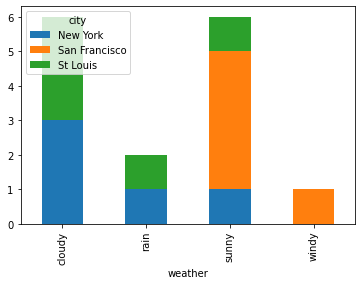

In [8]:
weather_df.groupby(['weather','city'])['weather'].count().unstack('city').fillna(0).plot(kind='bar',stacked=True)
plt.show()

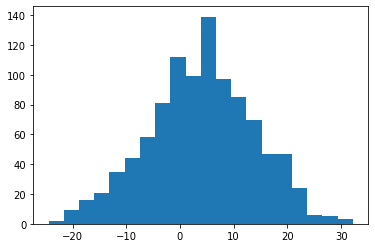

In [9]:
import numpy as np

samples = np.random.normal(4, 10, size=1000)
plt.hist(samples,bins=20)
plt.show()

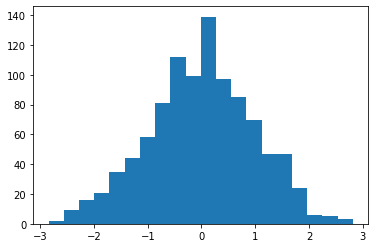

In [10]:
normalized_samples = (samples - 4)/10
plt.hist(normalized_samples,bins=20)
plt.show()

In [11]:
sample_mean = np.mean(samples)
sample_sd = np.std(samples)

In [12]:
print(sample_mean)
print(sample_sd)

3.971096111878079
9.852886696116236


### MIN-MAX SCALING

Dalam dataset ini, 'Kolom 1' isinya 1000 sampel dari distribusi normal dengan mean 4 juga memiliki STD dengan nilai 10. 'Kolom 2' berisi 1000 sampel juga, dengan distribusi seragam dari 1 sampai 2. 'Kolom 3' berisi 1000 sampel dari distibusi beta berparameter 2 dan 5

In [13]:
df = pd.read_csv("D:\RESEARCH\Dasarnya\MATH\Step_4_Statistics and Calculus Python\My Source Code\Work_3\data.csv")
df

,Column 1,Column 2,Column 3
0,-1.231356,1.305917,0.511994
1,7.874195,1.291636,0.155032
2,13.169984,1.274973,0.183988
3,13.442203,1.549126,0.391825
4,-8.032985,1.895236,0.398122
...,...,...,...
995,-6.698953,1.030317,0.153306
996,14.777217,1.671622,0.204935
997,7.226261,1.098545,0.312753
998,-10.736601,1.116582,0.560168


Gunakan fungsi <b>min_max_scale</b> yang mengambil tiga parameter (data, a, b). Data harus berupa array dalam atribut dataset, sementara a dan be menentukan rentang tmpat data nantinya akan diubah.<br><br>
Di sini kita menggunakan operasi vektorisasi

In [14]:
def min_max_scale(data,a,b):
    data_max = np.max(data)
    data_min = np.min(data)
    return a + (b-a)*(data - data_min)/(data_max - data_min)

Untuk melihat efeknya, kita visualisasi terlebih dahulu

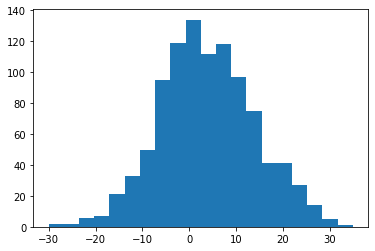

In [15]:
plt.hist(df['Column 1'],bins=20)
plt.show()

Selanjutnya, pakai fungsi <b>plt.hist()</b> untuk memvisualisasi nilai yang sudah direturn dari fungsi minmaxscale untuk menskalakannya ke rentang [-3, 3]

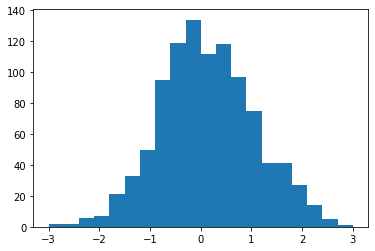

In [16]:
plt.hist(min_max_scale(df['Column 1'],-3,3),bins=20)
plt.show()

Dengan proses yang sama, untuk kolom 2

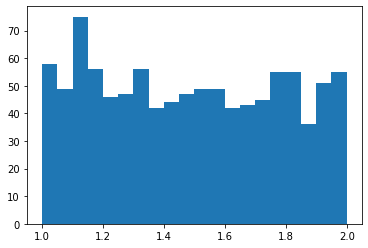

In [17]:
plt.hist(df['Column 2'], bins=20)
plt.show()

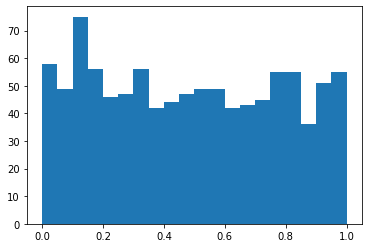

In [18]:
plt.hist(min_max_scale(df['Column 2'], 0, 1), bins=20)
plt.show()

Lagi-lagi untuk kolom 3

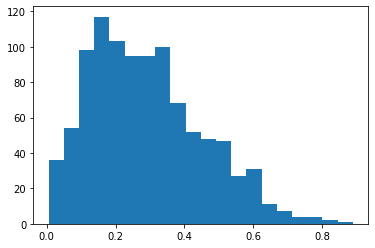

In [19]:
plt.hist(df['Column 3'], bins=20)
plt.show()

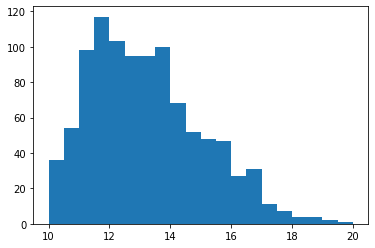

In [20]:
plt.hist(min_max_scale(df['Column 3'], 10, 20), \
                          bins=20)
plt.show()

### Visualizing Probability Density Functions

In [21]:
import numpy as np
import matplotlib.pyplot as plt

samples = np.random.normal(size=1000) # Create 1000 samples from normal D
mean = np.mean(samples)
median = np.median(samples)

q1 = np.percentile(samples,25)
q2 = np.percentile(samples,75)

In [22]:
print(mean)
print(median)
print(q1)
print(q2)

-0.03920542732921416
0.0068497241851329365
-0.7153560495005191
0.5941380833903871


Setelah itu, kita visualisasi menggunakan histogram, masing-masing kuratil buat dengan modelnya tersendiri

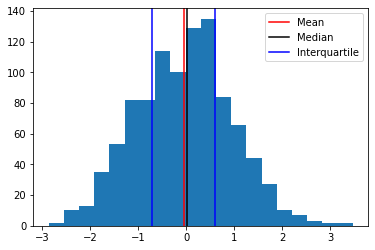

In [23]:
plt.hist(samples,bins=20)
plt.axvline(x=mean,c='red',label='Mean')
plt.axvline(x=median,c='black',label='Median')
plt.axvline(x=q1,c='blue',label='Interquartile')
plt.axvline(x=q2,c='blue')
plt.legend()
plt.show()

Terapkan metode generate data <i>beta</i> yang sama, dengan tambahkan parameter 2 dan 5, setelah itu visualisasi dengan cara yang sama

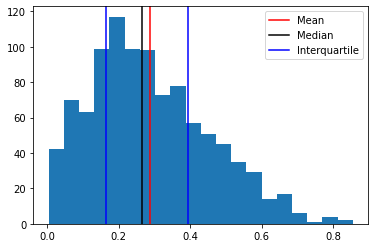

In [24]:
samples = np.random.beta(2, 5, size=1000) # Look at here!
mean = np.mean(samples)
median = np.median(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 75)

plt.hist(samples, bins=20)
plt.axvline(x=mean, c='red', label='Mean')
plt.axvline(x=median, c='black', label='Median')
plt.axvline(x=q1, c='blue', label='Interquartile')
plt.axvline(x=q2, c='blue')
plt.legend()
plt.show()

Sekarang, gunakan gamma dengan parameter 5. Visualisasikan dengan cara yang sama

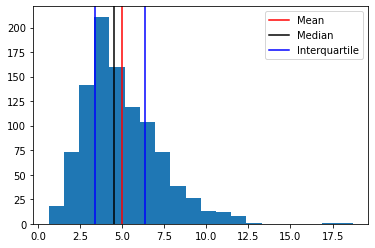

In [25]:
samples = np.random.gamma(5, size=1000) # Look at here!
mean = np.mean(samples)
median = np.median(samples)
q1 = np.percentile(samples, 25)
q2 = np.percentile(samples, 75)

plt.hist(samples, bins=20)
plt.axvline(x=mean, c='red', label='Mean')
plt.axvline(x=median, c='black', label='Median')
plt.axvline(x=q1, c='blue', label='Interquartile')
plt.axvline(x=q2, c='blue')
plt.legend()
plt.show()

In [26]:
df = pd.DataFrame({'numerical': np.random.normal(size=5),\
                   'categorical': ['a', 'b', 'a', 'c', 'b'],\
                   'ordinal': [1, 2, 3, 5, 4]})

In [27]:
df

,numerical,categorical,ordinal
0,0.792461,a,1
1,-0.638873,b,2
2,-1.501584,a,3
3,-2.300566,c,5
4,-1.902894,b,4


In [28]:
df.describe()

,numerical,ordinal
count,5.000000,5.000000
mean,-1.110291,3.000000
std,1.228901,1.581139
min,-2.300566,1.000000
25%,-1.902894,2.000000
50%,-1.501584,3.000000
75%,-0.638873,4.000000
max,0.792461,5.000000


In [29]:
df.describe(include='all')

,numerical,categorical,ordinal
count,5.000000,5,5.000000
unique,NaN,3,NaN
top,NaN,a,NaN
freq,NaN,2,NaN
mean,-1.110291,NaN,3.000000
std,1.228901,NaN,1.581139
min,-2.300566,NaN,1.000000
25%,-1.902894,NaN,2.000000
50%,-1.501584,NaN,3.000000
75%,-0.638873,NaN,4.000000


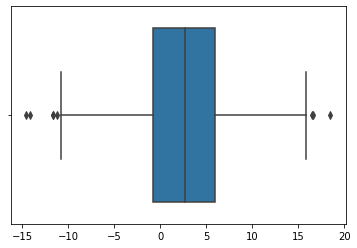

In [30]:
sns.boxplot(np.random.normal(2,5,size=1000))
plt.show()

In [31]:
df = pd.DataFrame({'numerical': np.random.normal(size=1000),\
                   'categorical': np.random.choice\
                                  (['a', 'b', 'c'], size=1000),\
                   'ordinal': np.random.choice\
                              ([1, 2, 3, 4, 5], size=1000)})

In [32]:
df

,numerical,categorical,ordinal
0,-2.157435,a,1
1,-0.305579,c,3
2,-0.261454,b,5
3,0.217598,c,5
4,-0.533606,b,2
...,...,...,...
995,-0.484590,b,1
996,1.321746,a,4
997,1.393333,c,4
998,1.486949,a,2


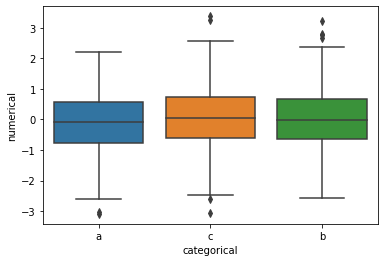

In [33]:
sns.boxplot(y='numerical',x='categorical',data=df)
plt.show()

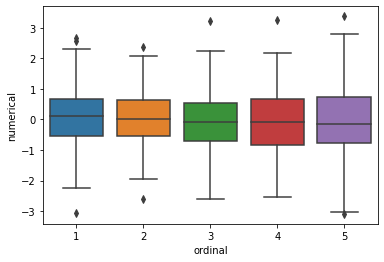

In [34]:
sns.boxplot(y='numerical',x='ordinal',data=df)
plt.show()

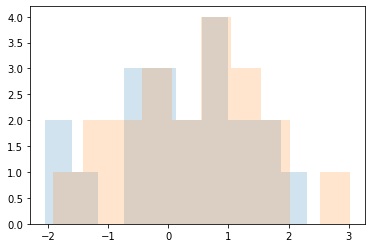

In [35]:
samples_a = np.random.normal(size=20)
samples_b = np.random.normal(0.2,1,size=20)

plt.hist(samples_a, alpha=0.2)
plt.hist(samples_b, alpha=0.2)
plt.show()

In [36]:
import scipy

scipy.stats.ttest_ind(samples_a,samples_b).pvalue

0.5897906741942166

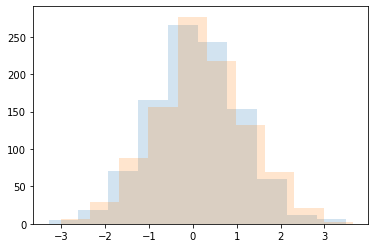

In [37]:
samples_a = np.random.normal(size=1000)
samples_b = np.random.normal(0.2, 1, size=1000)
plt.hist(samples_a, alpha=0.2)
plt.hist(samples_b, alpha=0.2)
plt.show()

In [38]:
scipy.stats.ttest_ind(samples_a,samples_b).pvalue

0.0012998870688756547

In [39]:
x = np.random.rand(500,)
y = x * 2 + np.random.normal(0, 0.3, 500)
z = np.random.rand(500,)

df = pd.DataFrame({'x': x, 'y': y, 'z': z})
df

,x,y,z
0,0.803639,1.537529,0.600584
1,0.121780,-0.165495,0.971682
2,0.145687,0.155150,0.241673
3,0.755933,1.136582,0.988683
4,0.946009,1.820105,0.698812
...,...,...,...
495,0.993825,1.621521,0.865127
496,0.602709,0.847773,0.879713
497,0.766952,1.256135,0.865169
498,0.390647,0.694537,0.187321


In [40]:
df.corr()

,x,y,z
x,1.000000,0.885693,0.074088
y,0.885693,1.000000,0.049686
z,0.074088,0.049686,1.000000


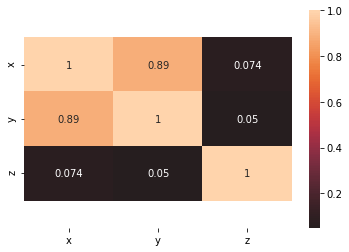

In [41]:
sns.heatmap(df.corr(),center=0,annot=True)
bottom, top = plt.ylim()

plt.ylim(bottom + 0.5, top - 0.5)
plt.show()

### Mengidentifikasi dan Menguji Kesamaan dari Means

In [42]:
# Using two inferential statistics methods!
# Tujuannya adalah mengidentifikasi atribut mana dalam kumpulan data ini yang berkorelasi satu sama lain dan kemudian menerapkan T-Test untuk menentukan apakah ada pasangan atribut yang memiliki mean yang sama.

import seaborn as sns

In [43]:
df = pd.read_csv("D:\RESEARCH\Dasarnya\MATH\Step_4_Statistics and Calculus Python\My Source Code\Work_3\data_2.csv")
df

,x,y,z,t
0,0.108610,0.901637,3.495175,5.548247
1,1.441267,1.666423,3.554596,-3.839294
2,-0.492374,0.112673,3.902964,13.713320
3,1.106691,0.754194,3.447355,8.432243
4,1.553509,3.087109,3.756501,-1.373107
...,...,...,...,...
195,1.493377,1.492880,3.925922,7.017622
196,2.026095,2.619088,3.566304,4.266780
197,1.645892,1.843177,3.300479,19.727741
198,5.199665,6.485575,3.315931,23.108194


Pada cell selanjutnya, kita gunakan heatmap untuk memvisualisasikan korelasi antar variable pada dataset yang sudah kita load sebelumnya

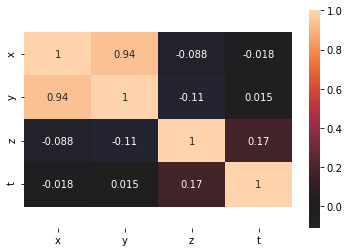

In [44]:
sns.heatmap(df.corr(),center=0,annot=True)
bottom, top = plt.ylim()

plt.ylim(bottom + 0.5, top - 0.5)
plt.show()

Gunakan jointplot pada library seaborn, setelah itu kita akan membuat plot gabungan dari 2 jenis, scatter plot pada two dimensional plane, dan 2 histogram yg merepresentasikan distribusi dari value2 tersebut

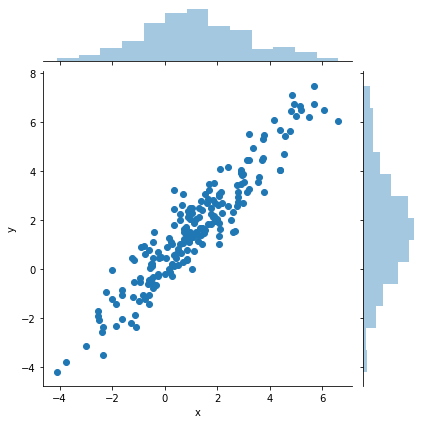

In [45]:
# Actually it is not clear whether the two attributes have the same mean or not
sns.jointplot(x='x',y='y',data=df)
plt.show()

Selanjutnya, kita gunakan T-Test untuk mengetahui apakah kedua atribut memiliki mean yang sama

In [46]:
scipy.stats.ttest_ind(df['x'],df['y']).pvalue

0.011436482008949079

See? p-value dibawah 0.05, mengindikasikan untuk menolak null hypothesis, kedua distribusi memiliki rata-rata yang sama

In [47]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [48]:
model.fit(df[['x','z']],df['y'])

LinearRegression()

In [49]:
model.coef_

array([ 1.06862616, -0.23163518])

In [50]:
model.predict([[1,2],[2,3]])

array([1.87603234, 2.71302333])

### MODEL SELECTION 

Selanjutnya, kita akan melakukan pemilihan model, di mana kita akan mencoba untuk menyesuaikan tiga model berbeda ke dataset tertentu, dan mempertimbangkan kinerja masing-masing model

In [54]:
# Import first!
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [55]:
# Sekarang, buat dataset sintetik nya
n_samples = 10000
centers = [(-2,2),(0,0),(2,2)]
X, y = make_blobs(n_samples=n_samples,centers=centers,shuffle=False,random_state=0)

In [56]:
X

array([[-0.23594765,  2.40015721],
       [-1.02126202,  4.2408932 ],
       [-0.13244201,  1.02272212],
       ...,
       [ 0.98700332,  2.27166174],
       [ 1.89100272,  1.94274075],
       [ 0.94106874,  1.67347156]])

In [57]:
y

array([0, 0, 0, ..., 2, 2, 2])

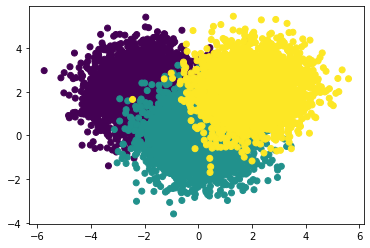

In [58]:
# Now, visualize this dataset using scatter plot!
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Cara pertama yang paling umum dari model selection adalah membagi data menjadi training dan test/validasi.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,random_state=0)

Selanjutnya, inisiasi model model yang akan kita import tanpa mengspesifikasi parameter apapun pada part ini

In [61]:
models = [KNeighborsClassifier(), SVC(), GradientBoostingClassifier()]

Selanjutnya, iterasi masing-masing model, di mana setiap iterasinya, model melakukan pelatihan nya masing-masing. Berikut caranya

In [65]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{type(model).__name__}: {accuracy_score(y_pred, y_test)}')

KNeighborsClassifier: 0.8792
SVC: 0.8952
GradientBoostingClassifier: 0.8876


Dari sini, kita bisa melihat, bahwa ternyata SVC memiliki performa terbaik.

Aktivitas selanjutnya adalah menggunakan kembali data the Communities and Crimes Dataset

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\RESEARCH\Dasarnya\MATH\Step_4_Statistics and Calculus Python\My Source Code\Work_3\CommViolPredUnnormalizedData.txt")

In [68]:
df

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,?,?,10,56216,3.07,6.87,61.68,15.23,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
2211,Pinevillecity,LA,?,?,10,12251,2.68,21.18,76.65,1.52,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
2212,Yucaipacity,CA,?,?,10,32824,2.46,0.52,92.62,0.98,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2
2213,Beevillecity,TX,?,?,10,13547,2.89,3.37,69.91,0.90,...,192,1508.01,474,3722.9,13,102.1,1,7.85,691.17,5340.87


Ganti semua special character '?'  menggunakan <b>np.nan</b>.

In [69]:
df = df.replace('?',np.nan)

In [70]:
df

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,NaN,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,NaN,NaN,10,56216,3.07,6.87,61.68,15.23,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
2211,Pinevillecity,LA,NaN,NaN,10,12251,2.68,21.18,76.65,1.52,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
2212,Yucaipacity,CA,NaN,NaN,10,32824,2.46,0.52,92.62,0.98,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2
2213,Beevillecity,TX,NaN,NaN,10,13547,2.89,3.37,69.91,0.90,...,192,1508.01,474,3722.9,13,102.1,1,7.85,691.17,5340.87


Selanjutnya kita akan menghitung kelompok usia yang berbeda, secara simpel menggunakan komputasi tervektorisasi

In [71]:
age_groups = ['12t21', '12t29', '16t24', '65up']

for group in age_groups:
    df['ageCnt' + group] = (df['population'] * df['agePct' + group]).astype(int)

df[['population'] + ['agePct' + group for group in age_groups] + ['agePct' + group for group in age_groups]].head()

,population,agePct12t21,agePct12t29,agePct16t24,agePct65up,agePct12t21,agePct12t29,agePct16t24,agePct65up
0,11980,12.47,21.44,10.93,11.33,12.47,21.44,10.93,11.33
1,23123,11.01,21.30,10.48,17.18,11.01,21.30,10.48,17.18
2,29344,11.36,25.88,11.01,10.28,11.36,25.88,11.01,10.28
3,16656,12.55,25.20,12.19,17.57,12.55,25.20,12.19,17.57
4,11245,24.46,40.53,28.69,12.65,24.46,40.53,28.69,12.65


In [73]:
group_state_df = df.groupby('state')
group_state_df.sum()[['ageCnt' + group for group in age_groups]]

,ageCnt12t21,ageCnt12t29,ageCnt16t24,ageCnt65up
state,,,,
AK,3971927,8302160,3835631,1059150
AL,26531311,48598259,25509908,20155405
AR,12457357,23201471,11819576,10139231
AZ,37010700,74073284,36542705,24874683
CA,313751289,655608220,320917351,205368238
CO,26880244,54754699,26904829,18303615
CT,33001089,68383070,33322119,32500776
DC,8217425,18103827,9522261,6997557
DE,528838,951577,576638,252814


In [74]:
# Coba kita ambil informasi secara detail pada objek df
df.describe()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,ageCnt12t21,ageCnt12t29,ageCnt16t24,ageCnt65up
count,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2.215000e+03,2.215000e+03,2.215000e+03
mean,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,...,27.419955,2783.835034,3.041124,0.980163,7.764786,5.859296,7.602877e+05,1.526908e+06,7.639458e+05,5.859072e+05
std,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,...,109.822600,2828.993341,4.912917,2.877128,58.166468,9.156829,2.792631e+06,5.872683e+06,2.860104e+06,2.256703e+06
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,0.900000,10.000000,0.000000,0.000000,0.000000,0.000000,6.308400e+04,1.151000e+05,5.824800e+04,2.369900e+04
25%,3.000000,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,...,7.300000,1181.900000,0.360000,0.000000,0.000000,0.000000,2.022965e+05,3.772230e+05,1.801620e+05,1.637320e+05
50%,5.000000,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,...,13.700000,2027.300000,1.220000,0.000000,1.000000,2.170000,3.209700e+05,6.166910e+05,3.016520e+05,2.608680e+05
75%,8.000000,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,...,26.100000,3321.700000,3.365000,0.000000,3.000000,8.365000,6.170790e+05,1.225713e+06,6.083580e+05,4.835810e+05
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,3569.800000,44229.900000,54.330000,48.440000,1946.000000,91.090000,9.563268e+07,2.010776e+08,9.585236e+07,8.508819e+07


Visualisasikan hitungannya menggunakan boxplot

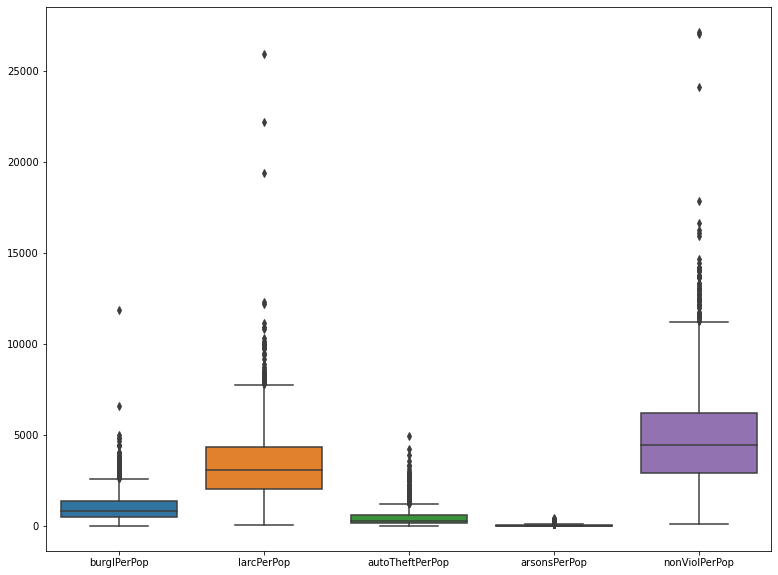

In [75]:
crime_df = df[['burglPerPop','larcPerPop','autoTheftPerPop', 'arsonsPerPop','nonViolPerPop']]

f, ax = plt.subplots(figsize=(13,10))
sns.boxplot(data=crime_df)
plt.show()

Bisa kita lihat, bahwa kejahatan yang bukan kekerasan, adalah yang paling umum

Sekarang kita coba visualisasi menggunakan heatmap, untuk matriks korelasi yang mengacu pada data yang sudah kita pretelin sebelumnya.

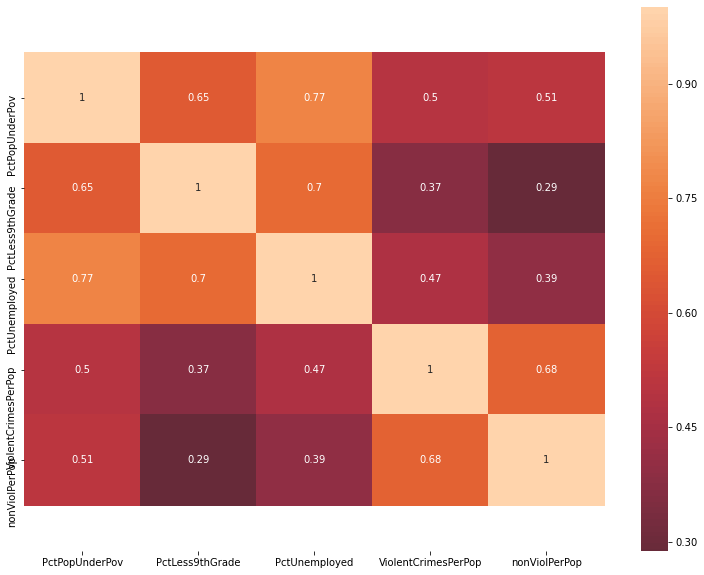

In [76]:
feature_columns = ['PctPopUnderPov', 'PctLess9thGrade','PctUnemployed', 'ViolentCrimesPerPop', 'nonViolPerPop']
filtered_df = df[feature_columns]
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(filtered_df.dropna().astype(float).corr(), center=0, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


Di sini kita bisa melihat, penduduk di bawah tingkat kemiskinan dan persentase pengangguran memiliki korelasi yang tinggi. Ini adalah insight yang seharusnya bisa dimengerti untuk menginfokan bagaimana faktor kejahatan terhubung satu sama lain.